In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ML_Model import (
    DataProcessing,
    SklearnModel,
    Logistic_Regression,
    Metrics,
    save_model,
    load_model,
)
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    MinMaxScaler,
)


### Get clean data
load train and test data and use DataProcessing to clean data

In [2]:
train_df = pd.read_csv("./dataset/HeartStudy_train.csv")
train_df.head()


,Sex,Age,SBP(mmHg),Treatment for Hypertension,Current Smoker,Diabetes,HDL,TCL,Risk
0,Female,74.0,113.0,Yes,Yes,No,66.0,135,Intermediate Risk (≥7.5% - <20%)
1,Male,69.0,93.0,No,No,Yes,48.0,374,High Risk (≥20%)
2,Female,43.0,94.0,No,No,No,83.0,315,Low Risk (<5%)
3,Female,63.0,140.0,No,Yes,Yes,14.0,195,High Risk (≥20%)
4,Female,67.0,NaN,Yes,No,Yes,34.0,275,High Risk (≥20%)


In [3]:
pre_processing_train = DataProcessing(train_df)
pre_processing_train.preprocessing()
train_df = pre_processing_train.clean_dataframe()


In [4]:
X_train = train_df.drop(columns=["Risk"])
y_train = train_df["Risk"]


In [5]:
test_df = pd.read_csv("./dataset/HeartStudy_test.csv")
test_df.head()


,Sex,Age,SBP(mmHg),Treatment for Hypertension,Current Smoker,Diabetes,HDL,TCL,Risk
0,Male,67,97,No,No,Yes,32,379,High Risk (≥20%)
1,Male,38,102,Yes,Yes,Yes,16,228,High Risk (≥20%)
2,Female,53,109,Yes,No,Yes,13,180,Intermediate Risk (≥7.5% - <20%)
3,Male,73,137,Yes,Yes,Yes,39,145,High Risk (≥20%)
4,Female,72,182,No,Yes,Yes,76,230,High Risk (≥20%)


In [6]:
pre_processing_test = DataProcessing(test_df)
pre_processing_test.preprocessing()
test_df = pre_processing_test.clean_dataframe()


In [7]:
X_test = test_df.drop(columns=["Risk"])
y_test = test_df["Risk"]


### Logistic Regression

In [8]:
numeric_column = train_df.select_dtypes("number").columns
category_column = ["Sex"]


In [9]:
model_lr = SklearnModel()
model_lr.logistic_regression(multi_class="multinomial", random_state=42, max_iter=250)
model_lr.pipeline(numeric_column=numeric_column, category_column=category_column)
model_lr.fit(X=X_train, y=y_train)


In [10]:
y_train_pred = model_lr.predict(X=X_train)
y_train_pred_prob = model_lr.predict_prob(X=X_train)


In [11]:
metrics = Metrics()


In [12]:
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)


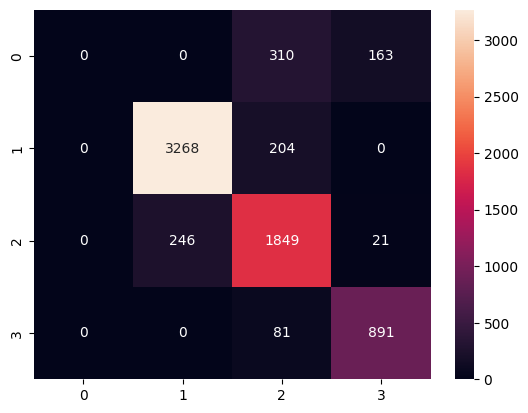

In [13]:
sns.heatmap(confusion_matrix, annot=True, fmt=".4g")
plt.show()


- Logistic regression is estimated by maximizing the log-likelihood objective function formulated under the assumption of maximizing the overall accuracy. That does not apply to the imbalanced data. 
- The resulting models tend to be biased towards the majority class (i.e. non-event), which can bring great loss in practice.

Why use AUC for imbalance dataset?

The AUC score is commonly used in studies of class imbalance because it does not depend to the specific class distribution and is insensitive to changes in class distribution.


In [14]:
print("Model accuracy:", metrics.accuracy(y_train, y_train_pred))
model_precision, model_recall, model_f1_score = metrics.precision_recall_fscore(
    y_train, y_train_pred
)
print("Model precision:", model_precision)
print("Model recall:", model_recall)
print("Model f1-score:", model_f1_score)
print("AUC Score:", metrics.roc_auc_value(y_train, y_train_pred_prob))


Model accuracy: 0.8542584956633016
Model precision: 0.6288445406568017
Model recall: 0.6829323579544629
Model f1-score: 0.6542731564674124
AUC Score: 0.9703990641540681


Logistic Regression on test data

In [15]:
y_test_pred = model_lr.predict(X=X_test)
y_test_pred_prob = model_lr.predict_prob(X=X_test)


In [16]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)


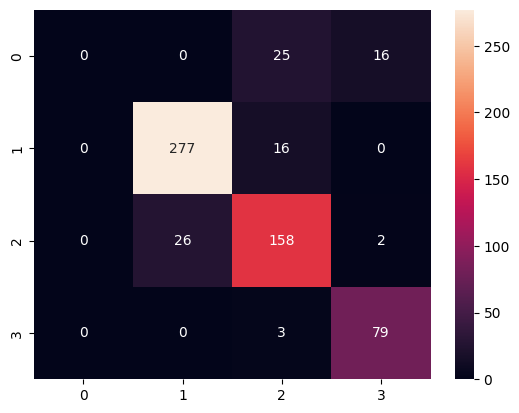

In [17]:
sns.heatmap(confusion_matrix, annot=True, fmt=".4g")
plt.show()


In [18]:
print("Model accuracy:", metrics.accuracy(y_test, y_test_pred))
model_precision, model_recall, model_f1_score = metrics.precision_recall_fscore(
    y_test, y_test_pred
)
print("Model precision:", model_precision)
print("Model recall:", model_recall)
print("Model f1-score:", model_f1_score)
print("AUC Score:", metrics.roc_auc_value(y_test, y_test_pred_prob))


Model accuracy: 0.8538205980066446
Model precision: 0.6277006566636045
Model recall: 0.689567372801329
Model f1-score: 0.6566611888197034
AUC Score: 0.9759904892500946


### Support vector machine(SVM)

In [19]:
numeric_column = train_df.select_dtypes("number").columns
category_column = ["Sex"]


In [20]:
model_svm = SklearnModel()
model_svm.svm()
model_svm.pipeline(numeric_column=numeric_column, category_column=category_column)
model_svm.fit(X=X_train, y=y_train)


In [21]:
y_train_pred = model_svm.predict(X=X_train)
y_train_pred_prob = model_svm.predict_prob(X=X_train)


In [45]:
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)


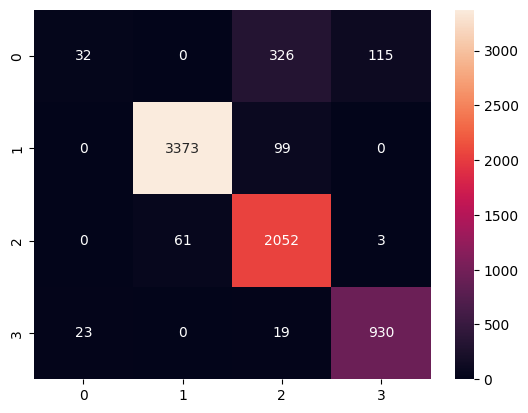

In [23]:
sns.heatmap(confusion_matrix, annot=True, fmt=".4g")
plt.show()


SVM classifier can be sensitive to high class imbalance, resulting in a drop in the classification performance on the positive class.
It is prone to generating a classifier that has a strong estimation bias towards the majority class, resulting in a large number of false negatives.

In [24]:
print("Model accuracy:", metrics.accuracy(y_train, y_train_pred))
model_precision, model_recall, model_f1_score = metrics.precision_recall_fscore(
    y_train, y_train_pred
)
print("Model precision:", model_precision)
print("Model recall:", model_recall)
print("Model f1-score:", model_f1_score)
print("AUC Score:", metrics.roc_auc_value(y_train, y_train_pred_prob))


Model accuracy: 0.9081473055595052
Model precision: 0.8183936513815624
Model recall: 0.7414209572089321
Model f1-score: 0.7271721248696168
AUC Score: 0.9905752613501431


Support vector machine on test data

In [25]:
y_test_pred = model_svm.predict(X=X_test)
y_test_pred_prob = model_svm.predict_prob(X=X_test)


In [26]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)


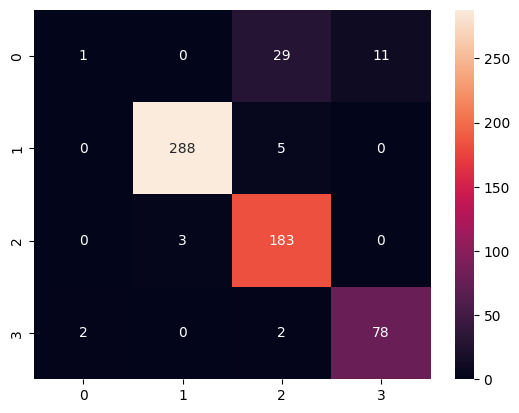

In [27]:
sns.heatmap(confusion_matrix, annot=True, fmt=".4g")
plt.show()


In [28]:
print("Model accuracy:", metrics.accuracy(y_test, y_test_pred))
model_precision, model_recall, model_f1_score = metrics.precision_recall_fscore(
    y_test, y_test_pred
)
print("Model precision:", model_precision)
print("Model recall:", model_recall)
print("Model f1-score:", model_f1_score)
print("AUC Score:", metrics.roc_auc_value(y_test, y_test_pred_prob))


Model accuracy: 0.9136212624584718
Model precision: 0.7587612469302512
Model recall: 0.7356039693557785
Model f1-score: 0.7119350801939123
AUC Score: 0.9925041706183759


### Decision Tree

In [29]:
numeric_column = train_df.select_dtypes("number").columns
category_column = ["Sex"]


In [30]:
model_dt = SklearnModel()
model_dt.decision_tree()
model_dt.pipeline(numeric_column=numeric_column, category_column=category_column)
model_dt.fit(X=X_train, y=y_train)


In [31]:
y_train_pred = model_dt.predict(X=X_train)
y_train_pred_prob = model_dt.predict_prob(X=X_train)


In [32]:
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)


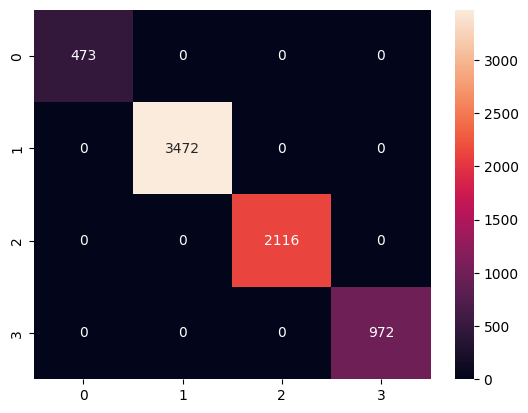

In [33]:
sns.heatmap(confusion_matrix, annot=True, fmt=".4g")
plt.show()


- Tree-based algorithms often perform well on imbalanced datasets.
- Boosting algorithms ( e.g AdaBoost, XGBoost,…) are ideal for imbalanced datasets because higher weight is given to the minority class at each successive iteration.

In [34]:
print("Model accuracy:", metrics.accuracy(y_train, y_train_pred))
model_precision, model_recall, model_f1_score = metrics.precision_recall_fscore(
    y_train, y_train_pred
)
print("Model precision:", model_precision)
print("Model recall:", model_recall)
print("Model f1-score:", model_f1_score)
print("AUC Score:", metrics.roc_auc_value(y_train, y_train_pred_prob))


Model accuracy: 1.0
Model precision: 1.0
Model recall: 1.0
Model f1-score: 1.0
AUC Score: 1.0


Decision Tree on test data

In [35]:
y_test_pred = model_dt.predict(X=X_test)
y_test_pred_prob = model_dt.predict_prob(X=X_test)


In [36]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)


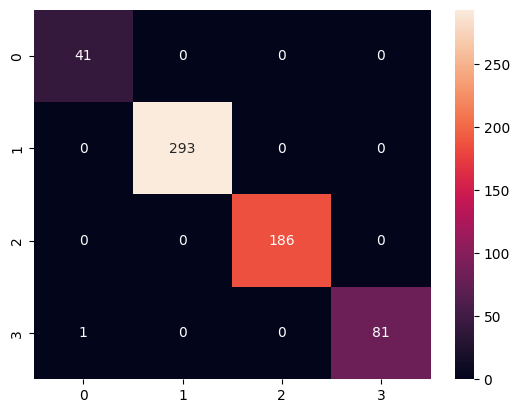

In [37]:
sns.heatmap(confusion_matrix, annot=True, fmt=".4g")
plt.show()


In [38]:
print("Model accuracy:", metrics.accuracy(y_test, y_test_pred))
model_precision, model_recall, model_f1_score = metrics.precision_recall_fscore(
    y_test, y_test_pred
)
print("Model precision:", model_precision)
print("Model recall:", model_recall)
print("Model f1-score:", model_f1_score)
print("AUC Score:", metrics.roc_auc_value(y_test, y_test_pred_prob))


Model accuracy: 0.9983388704318937
Model precision: 0.9940476190476191
Model recall: 0.9969512195121951
Model f1-score: 0.9954542094759405
AUC Score: 0.9982527933568106


#### Save and load model

Save

In [39]:
path = (
    "E:\\TAI\\intern lab\\week 2\\ai-ml-interns\\4_mini_project\\Anish\\best_model.pkl"
)
save_model(model=model_dt, path=path)


Load

In [40]:
model = load_model(path)


Test load model

In [41]:
y_test_pred = model_dt.predict(X=X_test)
y_test_pred_prob = model_dt.predict_prob(X=X_test)


In [42]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)


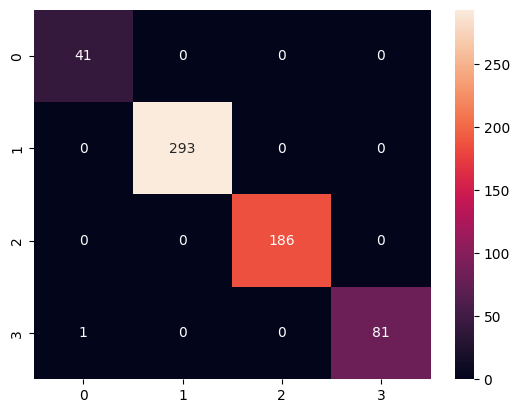

In [43]:
sns.heatmap(confusion_matrix, annot=True, fmt=".4g")
plt.show()


In [44]:
print("Model accuracy:", metrics.accuracy(y_test, y_test_pred))
model_precision, model_recall, model_f1_score = metrics.precision_recall_fscore(
    y_test, y_test_pred
)
print("Model precision:", model_precision)
print("Model recall:", model_recall)
print("Model f1-score:", model_f1_score)
print("AUC Score:", metrics.roc_auc_value(y_test, y_test_pred_prob))


Model accuracy: 0.9983388704318937
Model precision: 0.9940476190476191
Model recall: 0.9969512195121951
Model f1-score: 0.9954542094759405
AUC Score: 0.9982527933568106


---

### model from scratch
Logistic Regression

In [46]:
target_class = {
    "Low Risk (<5%)": 0,
    "Borderline Risk (>5% - <7.5%)": 1,
    "Intermediate Risk (≥7.5% - <20%)": 2,
    "High Risk (≥20%)": 3,
}
# encode target class
y_train.replace(target_class, inplace=True)


In [47]:
X_train.head()


,Sex,Age,SBP(mmHg),Treatment for Hypertension,Current Smoker,Diabetes,HDL,TCL
0,Female,74.0,113.0,1,1,0,66.0,135
1,Male,69.0,93.0,0,0,1,48.0,374
2,Female,43.0,94.0,0,0,0,83.0,315
3,Female,63.0,140.0,0,1,1,14.0,195
5,Male,66.0,184.0,1,0,1,44.0,404


In [48]:
target_class = {"Male": 0, "Female": 1}
# encode 'Sex' column
X_train.replace(target_class, inplace=True)


In [49]:
# applying normalization on feature data
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X=X_train.to_numpy())


In [50]:
# use logistic regressing
lr_model = Logistic_Regression(max_iter=200, lr=0.001)


In [51]:
lr_model.fit(X_train, y_train)


In [52]:
y_pred_arr = lr_model.predict(X_train)


In [53]:
loss = lr_model.loss_function(y_train.to_numpy(dtype=int), y_pred_arr)
loss


0.8937864353760842

In [54]:
y_train_pred = pd.Series(data=y_pred_arr, index=y_train.index, dtype=int, name="Risk")
y_train_pred_prob = lr_model.predict_prob(X_train)


In [55]:
target_class = {
    0: "Low Risk (<5%)",
    1: "Borderline Risk (>5% - <7.5%)",
    2: "Intermediate Risk (≥7.5% - <20%)",
    3: "High Risk (≥20%)",
}


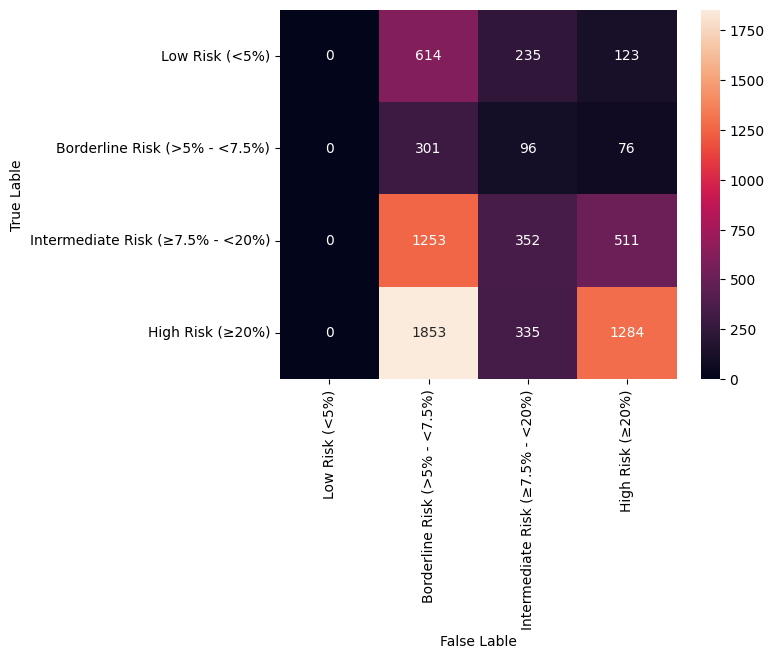

In [56]:
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
labels = list(target_class.values())
sns.heatmap(
    confusion_matrix, annot=True, fmt=".4g", xticklabels=labels, yticklabels=labels
)
plt.xlabel("False Lable")
plt.ylabel("True Lable")
plt.show()


In [57]:
print("Model accuracy:", metrics.accuracy(y_train, y_train_pred))
model_precision, model_recall, model_f1_score = metrics.precision_recall_fscore(
    y_train, y_train_pred
)
print("Model precision:", model_precision)
print("Model recall:", model_recall)
print("Model f1-score:", model_f1_score)
print("AUC Score:", metrics.roc_auc_value(y_train, y_train_pred_prob))


Model accuracy: 0.2754158964879852
Model precision: 0.2661412068916066
Model recall: 0.2931327278429236
Model f1-score: 0.20710070874157985
AUC Score: 0.6127232389755962


In [58]:
target_class = {
    "Low Risk (<5%)": 0,
    "Borderline Risk (>5% - <7.5%)": 1,
    "Intermediate Risk (≥7.5% - <20%)": 2,
    "High Risk (≥20%)": 3,
}
y_train.replace(target_class, inplace=True)
y = y_train.to_numpy()


In [ ]:
classes = list(target_class.keys())


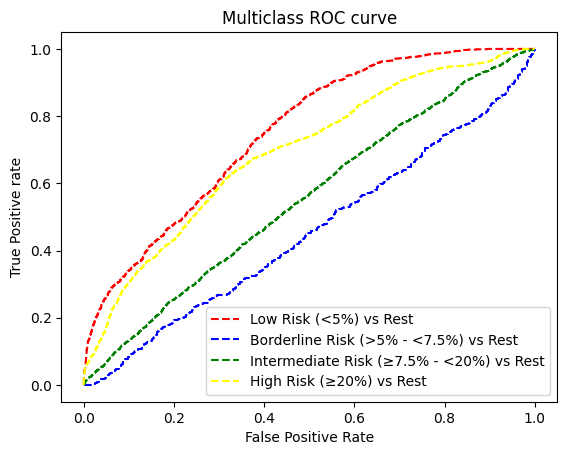

In [ ]:
metrics.roc_plot(y=y_train, y_prob=y_train_pred_prob, classes=classes)


---

In [ ]:
target_class = {
    "Low Risk (<5%)": 0,
    "Borderline Risk (>5% - <7.5%)": 1,
    "Intermediate Risk (≥7.5% - <20%)": 2,
    "High Risk (≥20%)": 3,
}
y_test.replace(target_class, inplace=True)


In [ ]:
X_test.head()


,Sex,Age,SBP(mmHg),Treatment for Hypertension,Current Smoker,Diabetes,HDL,TCL
0,Male,67,97,0,0,1,32,379
1,Male,38,102,1,1,1,16,228
2,Female,53,109,1,0,1,13,180
3,Male,73,137,1,1,1,39,145
4,Female,72,182,0,1,1,76,230


In [ ]:
target_class = {"Male": 0, "Female": 1}
X_test.replace(target_class, inplace=True)


In [ ]:
y_pred_arr = lr_model.predict(X_test)
y_test_pred_prob = lr_model.predict_prob(X_test)


In [ ]:
y_test_pred = pd.Series(data=y_pred_arr, index=y_test.index, dtype=int, name="Risk")


In [ ]:
target_class = {
    0: "Low Risk (<5%)",
    1: "Borderline Risk (>5% - <7.5%)",
    2: "Intermediate Risk (≥7.5% - <20%)",
    3: "High Risk (≥20%)",
}


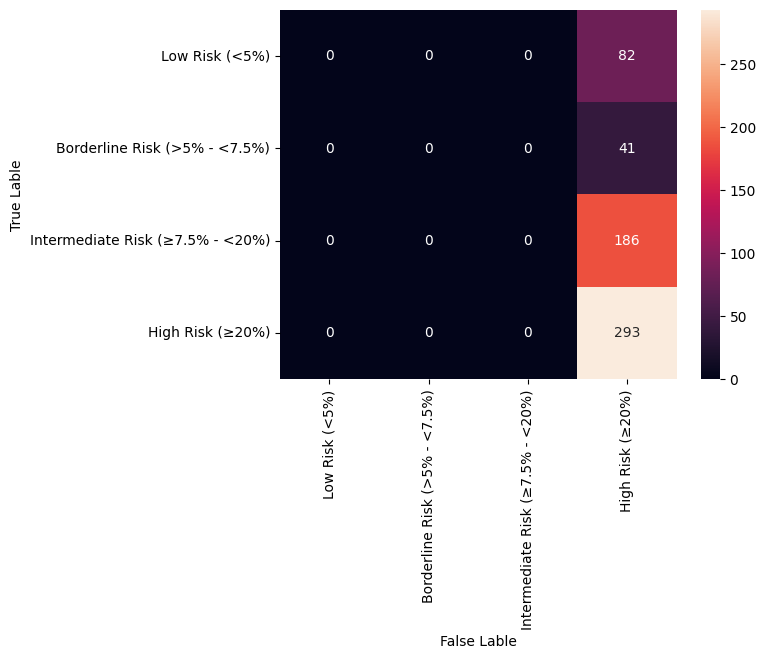

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
labels = list(target_class.values())
sns.heatmap(
    confusion_matrix, annot=True, fmt=".4g", xticklabels=labels, yticklabels=labels
)
plt.xlabel("False Lable")
plt.ylabel("True Lable")
plt.show()


In [ ]:
print("Model accuracy:", metrics.accuracy(y_test, y_test_pred))
model_precision, model_recall, model_f1_score = metrics.precision_recall_fscore(
    y_train, y_train_pred
)
print("Model precision:", model_precision)
print("Model recall:", model_recall)
print("Model f1-score:", model_f1_score)
print("AUC Score:", metrics.roc_auc_value(y_test, y_test_pred_prob))


Model accuracy: 0.4867109634551495
Model precision: 0.2661412068916066
Model recall: 0.2931327278429236
Model f1-score: 0.20710070874157985
AUC Score: 0.6595748368929046


In [ ]:
target_class = {
    "Low Risk (<5%)": 0,
    "Borderline Risk (>5% - <7.5%)": 1,
    "Intermediate Risk (≥7.5% - <20%)": 2,
    "High Risk (≥20%)": 3,
}
y_test.replace(target_class, inplace=True)
y = y_test.to_numpy()


ROC curve

In [ ]:
classes = list(target_class.keys())


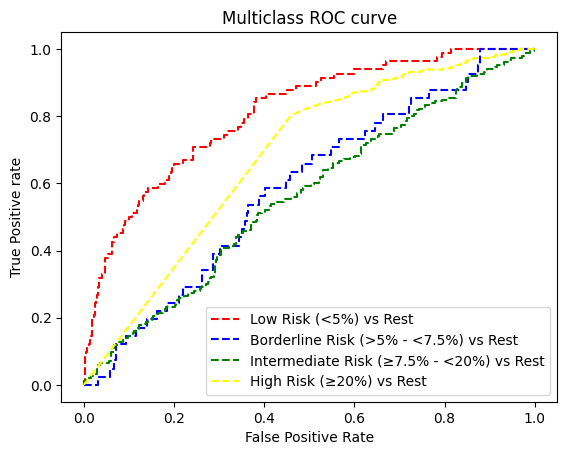

In [ ]:
metrics.roc_plot(y=y_test, y_prob=y_test_pred_prob, classes=classes)
